# What colors are associated with which themes?

In [35]:
import pandas as pd
import numpy as np

In [36]:
#Loading the file of colors and check if the color id in unique
colorfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/colors.csv'
color = pd.read_csv(colorfile,index_col="id")
color.head()
color.index.is_unique  
color = pd.read_csv(colorfile)

In [37]:
#Loading the file of invertory parts.
invenPartsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventory_parts.csv'
inven_part = pd.read_csv(invenPartsfile, index_col="inventory_id")
inven_part.head()
inven_part.index.is_unique
#The inventory id is not unique
inven_part = pd.read_csv(invenPartsfile)

In [38]:
#Loading the file of inventory.
invefile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventories.csv'
inven = pd.read_csv(invefile, index_col="id")
inven.head()
inven.index.is_unique
inven = pd.read_csv(invefile)

In [39]:
#Loading the file of sets
setsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile, index_col="set_num")
sets.head()
sets.index.is_unique
sets = pd.read_csv(setsfile)

In [40]:
#Loading the file of themes
themesfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/themes.csv'
theme = pd.read_csv(themesfile,index_col = 'id')
theme.head()
theme.index.is_unique
theme = pd.read_csv(themesfile)

In [41]:
#inner join colors and inventory parts
ci=pd.merge(color,inven_part,left_on="id",right_on="color_id",how="inner")
#drop the repeat column
ci = ci.drop(ci.columns[0],axis=1)
ci.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare
0,Unknown,0033B2,f,80,belvfair6,-1,1,f
1,Unknown,0033B2,f,80,belvfem26,-1,1,f
2,Unknown,0033B2,f,80,belvmale13,-1,1,f
3,Unknown,0033B2,f,214,fab6e,-1,1,f
4,Unknown,0033B2,f,250,belvfair4,-1,1,f


In [42]:
#inner join ci and inventories
cii = pd.merge(ci,inven,left_on="inventory_id",right_on="id",how="inner")
#drop the repeat column
cii = cii.drop(cii.columns[8],axis=1)
cii.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1


In [43]:
#inner join cii and sets
ciis = pd.merge(cii,sets,on="set_num",how="inner")
ciis.head()

,name_x,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num,name_y,year,theme_id,num_parts
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1,Royal Coach,2000,319,85
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1,Royal Coach,2000,319,85
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1,Royal Coach,2000,319,85
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1,Royal Coach,2000,319,85
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1,Royal Coach,2000,319,85


In [44]:
#inner join ciis and theme
ciist = pd.merge(ciis,theme,left_on='theme_id',right_on='id')
ciist = ciist.drop(ciist.columns[14],axis=1)
ciist.head()

,name_x,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num,name_y,year,theme_id,num_parts,name,parent_id
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1,Royal Coach,2000,319,85,Fairy-Tale,318.0
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1,Royal Coach,2000,319,85,Fairy-Tale,318.0
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1,Royal Coach,2000,319,85,Fairy-Tale,318.0
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1,Royal Coach,2000,319,85,Fairy-Tale,318.0
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1,Royal Coach,2000,319,85,Fairy-Tale,318.0


In [45]:
#select name_x and name of columns
ColorTheme=pd.DataFrame(ciist[['name_x','name','rgb']])
ColorTheme=ColorTheme.rename(index=str,columns={"name_x":"Color","name":"Theme"})
ColorTheme.head()

,Color,Theme,rgb
0,Unknown,Fairy-Tale,0033B2
1,Unknown,Fairy-Tale,0033B2
2,Unknown,Fairy-Tale,0033B2
3,Blue,Fairy-Tale,0055BF
4,Blue,Fairy-Tale,0055BF


In [46]:
ColorTheme.to_csv('colorTheme.csv')

In [57]:
#group theme by color
countThemeNum = pd.DataFrame(ColorTheme.groupby('Theme').Color.value_counts())
countThemeNum = countThemeNum.rename(columns={"Color":"Count"})
countThemeNum = countThemeNum.reset_index()
countThemeNum

,Theme,Color,Count
0,12V,Black,576
1,12V,Red,326
2,12V,Light Gray,314
3,12V,Blue,127
4,12V,Yellow,121
5,12V,White,119
6,12V,Trans-Clear,56
7,12V,Dark Gray,25
8,12V,Trans-Red,13
9,12V,[No Color],11


In [48]:
MostFrequent = countThemeNum.groupby('Theme').first().reset_index()
MostFrequent.head()

,Theme,Color,Count
0,12V,Black,576
1,4 Juniors,White,10
2,4.5V,Black,920
3,9V,Black,1163
4,Advent,Red,59


In [56]:
#Plot the graph of number of color exist in MostFrequent table.
count = MostFrequent.groupby('Color').count().reset_index()
count = count.drop(['Count'],axis=1)
count.head()

,Color,Theme
0,Black,245
1,Blue,1
2,Brown,1
3,Dark Blue,1
4,Dark Bluish Gray,12


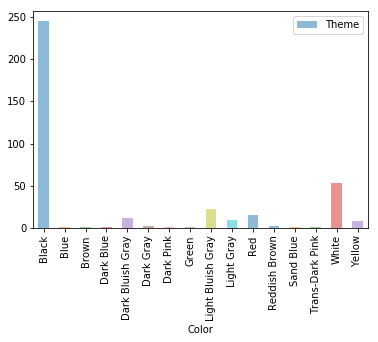

In [50]:
import matplotlib.pyplot as plt
#popular colors in there sets
count.plot.bar(x='Color',y='Theme',align='center', alpha=0.5)

In [51]:
#Total count and frequency of color in each theme

In [52]:
countTheme = pd.DataFrame(ColorTheme.groupby('Theme').Color.value_counts())
countTheme = countTheme.rename(columns={"Color":"Count"})
countTheme = countTheme.groupby(level=0).apply(lambda x: x / float(x.sum()))
countTheme = countTheme.reset_index(level='Color')
countTheme = countTheme.groupby('Theme').nth([0,1,2,3])
countTheme = countTheme.reset_index(level='Theme')
countTheme.head()

,Theme,Color,Count
0,12V,Black,0.338227
1,12V,Red,0.191427
2,12V,Light Gray,0.184381
3,12V,Blue,0.074574
4,4 Juniors,White,1.000000


In [53]:
countTheme.to_csv('colorFrequency.csv')

In [54]:
import matplotlib.pyplot as plt

ValueError: Can only compare identically-labeled Series objects

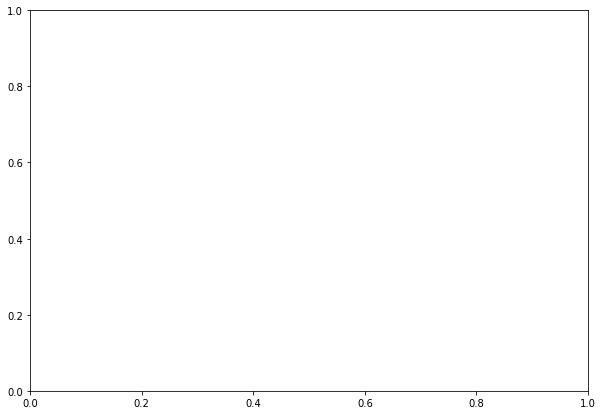

In [55]:
fig, ax = plt.subplots(figsize=(10,7))  

Color = countTheme['Color'].drop_duplicates()
margin_bottom = np.zeros(len(countTheme['Theme'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476","k"]

for num, month in enumerate(Color):
    values = list(countTheme[countTheme['Color'] == Color].loc[:, 'Count'])

    countTheme[countTheme['Color'] == Color].plot.bar(x='Theme',y='Count', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=Color)
    margin_bottom += values

plt.show()

# How the colors of LEGOs included in sets changed over time?

In [ ]:
import pandas as pd
import numpy as np

In [21]:
#Loading the file of colors and check if the color id in unique
colorfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/colors.csv'
color = pd.read_csv(colorfile,index_col="id")
color.head()
color.index.is_unique  
color = pd.read_csv(colorfile)

In [22]:
#Loading the file of invertory parts.
invenPartsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventory_parts.csv'
inven_part = pd.read_csv(invenPartsfile, index_col="inventory_id")
inven_part.head()
inven_part.index.is_unique
#The inventory id is not unique
inven_part = pd.read_csv(invenPartsfile)


In [23]:
#Loading the file of inventory.
invefile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventories.csv'
inven = pd.read_csv(invefile, index_col="id")
inven.head()
inven.index.is_unique
inven = pd.read_csv(invefile)


In [24]:
#Loading the file of sets
setsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile, index_col="set_num")
sets.head()
sets.index.is_unique
sets = pd.read_csv(setsfile)


In [25]:
#inner join colors and inventory parts
ci=pd.merge(color,inven_part,left_on="id",right_on="color_id",how="inner")
#drop the repeat column
ci = ci.drop(ci.columns[0],axis=1)
ci.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare
0,Unknown,0033B2,f,80,belvfair6,-1,1,f
1,Unknown,0033B2,f,80,belvfem26,-1,1,f
2,Unknown,0033B2,f,80,belvmale13,-1,1,f
3,Unknown,0033B2,f,214,fab6e,-1,1,f
4,Unknown,0033B2,f,250,belvfair4,-1,1,f


In [26]:
#inner join ci and inventories
cii = pd.merge(ci,inven,left_on="inventory_id",right_on="id",how="inner")
#drop the repeat column
cii = cii.drop(cii.columns[8],axis=1)
cii.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1


In [27]:
#inner join cii and sets
ciis = pd.merge(cii,sets,on="set_num",how="inner")
ciis.head()

,name_x,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num,name_y,year,theme_id,num_parts
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1,Royal Coach,2000,319,85
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1,Royal Coach,2000,319,85
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1,Royal Coach,2000,319,85
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1,Royal Coach,2000,319,85
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1,Royal Coach,2000,319,85


In [28]:

ciis2000=ciis.loc[ciis['year'] == 2000]


In [33]:
#count number of colors that are using in different years. include no color and unknown.
count = ciis[['year','color_id']]
count.drop_duplicates()
#count = count.groupby(['year'],as_index=False)['color_id'].count()
count.head()

,year,color_id
0,2000,-1
1,2000,-1
2,2000,-1
3,2000,1
4,2000,1


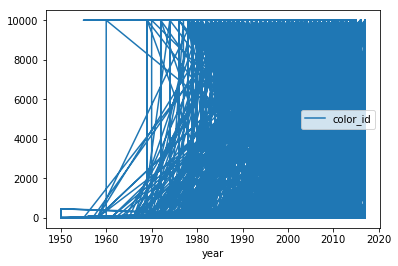

In [34]:
import matplotlib.pyplot as plt
count.set_index('year',inplace=True)
#count = count.cumsum()
count.plot()

In [35]:
import matplotlib.pyplot as plt

In [36]:
countYearNum = pd.DataFrame(ciis.groupby('year').color_id.value_counts())
countYearNum = countYearNum.rename(columns={"color_id":"Color"})
countYearNum = countYearNum.reset_index()
countYearNum.head()

,year,color_id,Color
0,1950,4,8
1,1950,14,8
2,1950,15,8
3,1950,1,6
4,1950,2,6


In [38]:
colorCount=pd.DataFrame(countYearNum['color_id'].value_counts())
colorCount=colorCount.reset_index()
colorCount=colorCount.rename(columns={"color_id":"count","index":"color"})
from pandas.api.types import is_numeric_dtype
colorCount.head()


,color,count
0,4,66
1,15,66
2,47,65
3,1,65
4,14,64


In [34]:
yearCount = pd.DataFrame(countYearNum['year'].value_counts())
yearCount=yearCount.reset_index()
yearCount=yearCount.rename(columns={"index":"year","year":"count"})
yearCount = yearCount.sort_values(by='year')
yearCount.head()

NameError: name 'countYearNum' is not defined

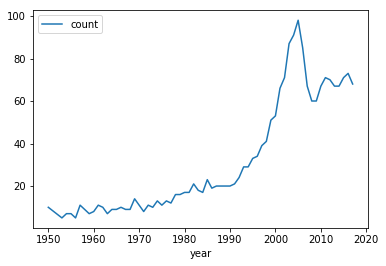

In [62]:
yearCount.plot(x='year',y='count')

In [39]:
import pylab as pl
from pandas import *

Text(0,0.5,'Frequency')

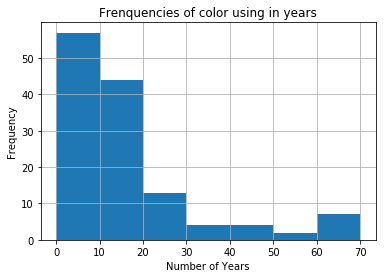

In [40]:
#How long does color exist
cy = colorCount.hist(column='count',range=[0,70],bins=7)
pl.title("Frenquencies of color using in years")
pl.xlabel("Number of Years")
pl.ylabel("Frequency")


# What sets have the most-used pieces in them?

In [318]:
setsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/q3.csv'
df = pd.read_csv(setsfile)

In [319]:
df.head()

,Unnamed: 0,name_set,part_num,name,freq
0,607,Large Wheels and Axles,2536,"Plant Tree Palm Trunk - Short Connector, no Ax...",1
1,609,Large Wheels and Axles,2711,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs...",1
2,610,Large Wheels and Axles,2717,Technic Seat [3 x 2 Base],1
3,614,Large Wheels and Axles,2952,Propeller 2 Blade 9 Diameter,1
4,628,Large Wheels and Axles,3650c,Technic Gear 24 Tooth Crown with Reinforcement...,1


In [320]:
# delete columns:  Unnamed:0 and freq 
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('freq', axis=1)
df = df.drop('part_num',axis =1)
df.head()

,name_set,name
0,Large Wheels and Axles,"Plant Tree Palm Trunk - Short Connector, no Ax..."
1,Large Wheels and Axles,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs..."
2,Large Wheels and Axles,Technic Seat [3 x 2 Base]
3,Large Wheels and Axles,Propeller 2 Blade 9 Diameter
4,Large Wheels and Axles,Technic Gear 24 Tooth Crown with Reinforcement...


In [321]:
df.freq = df['name_set'].value_counts()
df.freq = df.freq.to_frame()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [324]:
df.freq = df.freq.reset_index()
df.freq =df.freq.rename(columns = {'index':'setname'})
df.freq =df.freq.rename(columns = {'name_set':'freq'})
df.freq.head()

,setname,setname,setname,freq
0,0,0,Harbor Sentry,44
1,1,1,Mini Construction,36
2,2,2,Spyrius Fold-Wing Spacecraft,22
3,3,3,Aqua Res-Q Transport,18
4,4,4,Enchanted Island,16


In [327]:
import seaborn as sns

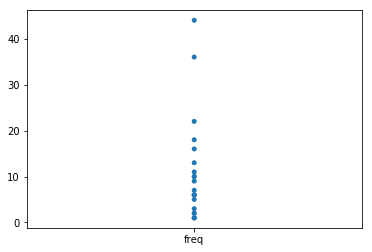

In [330]:
graph = sns.stripplot(data=df.freq);

In [331]:
setname = df.freq.setname.tolist()
freq = df.freq.freq.tolist()
print(setname)
print(freq)

AttributeError: 'DataFrame' object has no attribute 'tolist'